In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import string
import spacy
from nltk.corpus import stopwords, gutenberg
import spacy
from spacy.pipeline import SentenceSegmenter
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en')
#import nltk 
#from nltk.corpus import stopwords set(stopwords.words('english'))

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
from spacy.pipeline import SentenceSegmenter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, normalize

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
# Evaluate the performance of the clusters
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot.plotters as skplt
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

In [50]:
Alice= strip_headers(load_etext(19002)).strip()
Christmas= strip_headers(load_etext(19337)).strip()


In [51]:
#round 1 of cleaning data
def text_cleaner_1(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--', ' ',text)
    #remove brackets
    text = re.sub("[\[].*?[\]]", '', text)
    #remove volume
    text = re.sub(r'VOLUME \w', '', text)
    #remove words contaning numbers
    text = re.sub('\w*\d\w*', '', text)
    #remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Search for all non-letters
    # Replace all non-letters with spaces
    # Remove story section separators, add uniform story section separator
    text = re.sub('(\s*\*){5}', '@SentBoundary@' , text)
    text = re.sub(r'C[Hh][Aa][Pp][Tt][Ee][Rr] [\d\w]+', '@SentBoundary@' , text)
    #text = re.sub("[^a-zA-Z]", " ", str(text))
    #remove white space
    tex= text.lower()
    text = ' '.join(text.split())
    return text

In [52]:
Alice=text_cleaner_1(Alice)[:100000]
Christmas=text_cleaner_1(Christmas)[:100000]

In [53]:
Christmas_doc = nlp(Christmas)
Alice_doc = nlp(Alice)

In [54]:
Alice_sents = [[sent, 'Alice'] for sent in Alice_doc.sents]
Christmas_sents = [[sent, 'Christmas'] for sent in Christmas_doc.sents]

In [55]:
sentences = pd.DataFrame(Alice_sents + Christmas_sents)
sentences.head()

,0,1
0,"(Online, Distributed, Proofreading, Team, at, ...",Alice
1,"(UNDER, GROUND, BEING, A, FACSIMILE, OF, THE, ...",Alice
2,"(BY, LEWIS, CARROLL)",Alice
3,"(WITH, THIRTYSEVEN, ILLUSTRATIONS, BY, THE, AU...",Alice
4,"(I, DOWN, THE, RABBITHOLE)",Alice


# Bag of Words

In [56]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
alicewords = bag_of_words(Alice_doc)
christmaswords = bag_of_words(Christmas_doc)

# Combine bags to create a set of unique words.
common_words = set(alicewords + christmaswords)

In [57]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750


,fragment,curiosity,ALICE,excuse,slate,chamber,pudding,ruddy,cling,convey,...,peg,Bobs,appalling,Future,Public,attach,key,snugly,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Online, Distributed, Proofreading, Team, at, ...",Alice
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(UNDER, GROUND, BEING, A, FACSIMILE, OF, THE, ...",Alice
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(BY, LEWIS, CARROLL)",Alice
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(WITH, THIRTYSEVEN, ILLUSTRATIONS, BY, THE, AU...",Alice
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(I, DOWN, THE, RABBITHOLE)",Alice


In [59]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set score: 0.9763257575757576

Test set score: 0.7531914893617021


In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

(1056, 3052) (1056,)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.9630681818181818

Test set score: 0.7900709219858156


# TF-IDF

In [61]:
lemma_sents = [' '.join([token.lemma_ for token in sent]) for sent in sentences[0]]

In [62]:
from sklearn.feature_extraction import text
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%", 'pron']
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

X_train, X_test, y_train, y_test = train_test_split(lemma_sents, 
                                                    sentences[1], 
                                                    test_size=0.25, 
                                                    random_state=0)

#creating our Tf_idf vectorizer
vectorizer_tfidf = TfidfVectorizer(max_df= 0.80, # drop words that occur in more than this % of paragraphs
                             min_df=5, # only use words that appear at least 10 times
                             stop_words=stop_words, 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


# Fit and transform training data set, only transform test
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


# Logistic Regression with CV and tf-idf

In [73]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(penalty='l1')

scores = cross_val_score(lr, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.70676692 0.7518797  0.7443609  0.78787879 0.78787879 0.72727273
 0.71212121 0.7480916  0.74045802 0.73282443]
0.7439533079750035


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest with CV and tf-idf

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
print('RF is better than LR')

[0.68421053 0.72180451 0.7518797  0.8030303  0.76515152 0.79545455
 0.71969697 0.77099237 0.76335878 0.75572519]
0.7531304406053302
RF is better than LR


In [132]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=7, min_samples_split= 10, max_features=5)

train = rfc.fit(X_train_tfidf, y_train)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))

Training set score: 0.8484848484848485

Test set score: 0.7913832199546486


Feature ranking:
1. feature 329 (0.0685) scrooge
2. feature 8 (0.0582) alice
3. feature 145 (0.0265) ghost
4. feature 63 (0.0251) christmas
5. feature 368 (0.0165) spirit
6. feature 298 (0.0164) queen
7. feature 396 (0.0154) think
8. feature 229 (0.0153) man
9. feature 249 (0.0151) mouse
10. feature 158 (0.0140) gryphon
11. feature 303 (0.0133) rabbit
12. feature 412 (0.0132) turtle
13. feature 264 (0.0119) oh
14. feature 219 (0.0116) little
15. feature 410 (0.0115) try
16. feature 232 (0.0100) marley
17. feature 162 (0.0089) hand
18. feature 53 (0.0088) caterpillar
19. feature 252 (0.0086) mrs
20. feature 27 (0.0083) begin


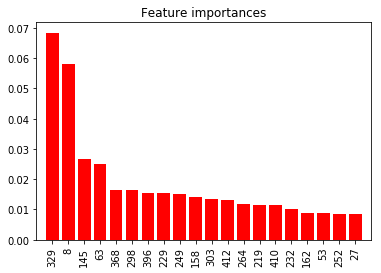

In [133]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

terms = vectorizer_tfidf.get_feature_names()

for f in range(20):
    print('{}. feature {} ({:.4f}) {}'.format((f+1), indices[f], importances[indices[f]], terms[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), indices, rotation=90)
plt.xlim([-1, 20])
plt.show()